### Problem Statement

In [1]:
# Problem Statement :
#       Data regarding Sales, Profit etc.. across different Categories and Regions were given
#    And we have to Analyze the Data and provide the Stakeholders with Insights to Improve their Business Performance
#  They want to know which Category of Products are most profitable, which Region has the most Sales and Profit, and what are the most profitable Products.

### Assumptions

In [2]:
# Assumptions : 
#     Assuming that the Data Provided is accutate and has all samples of Transactions 
#    Also, assuming that the Data is sufficient to find patterns in Sales and Profitability
#   Also assuming that the Data is not impacted by any significant Outliers that could skew the Analysis.

### Research Questions

In [3]:
# Research Questions : (framing the Questions based on Problem Statement)
# 1. Which Product Categories have the Highest Profit Margin ?
# 2. Are there any significant differences in sales between East region and other Regions ?
# 3. How do the Sales vary by Product Category during different Months of the Year ?
# 4. What is the rate of Returned Products for orders with same-day shipping, compared to other Shipping modes ?
# 5. How to Sales and Profit vary by product categories on Weekdays compared to Weekends ?

### Hypothesis

In [4]:
# Hypothesis : (assuming these to hold True, after analyzing...will Accept or Reject this hypothesis)
# Hypothesis 1. 'Technology' category products have the highest profit margin compared to other categories
# Hypothesis 2. 'East' Region has the highest sales compared to other Regions
# Hypothesis 3. Sales are higher during certain Months of the Year
# Hypothesis 4. Orders with 'Same Day' shipping have lowest rate of Returned Products
# Hypothesis 5. The Company's profit is more on Weekdays than on Weekends

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('superstore_dataset.csv', encoding='ISO-8859-1')

### Exploring the Data

In [7]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [9]:
df.shape

(51290, 24)

#### Getting more Info on Data to see DataTypes, non null values...etc

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [11]:
import warnings
warnings.filterwarnings("ignore")
df.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.009671,-0.043889,-0.173483,0.087594,-0.019037,-0.039078
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025449
Sales,-0.043889,-0.023854,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,-0.173483,0.012761,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,0.087594,0.058443,-0.086722,-0.019875,1.000000,-0.316490,-0.079056
Profit,-0.019037,-0.029961,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,-0.039078,-0.025449,0.768073,0.272649,-0.079056,0.354441,1.000000


#### Checking Null Values

In [12]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

#### Checking Duplicate Values

In [13]:
df.duplicated().sum()

0

In [14]:
# No Duplicate Values so moving on

In [15]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


### Removing Unnecessary Columns

In [16]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [17]:
df.drop(['Row ID', 'Order ID', 'Customer ID', 'Postal Code'], axis =1, inplace=True)
# dropping then cause they are not useful to solve the problem statement

In [18]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

### Hypothesis 1. 'Technology' category products have the highest profit margin compared to other categories

In [19]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [20]:
df['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [21]:
df1 = df.groupby('Category')['Profit'].sum()
df1

Category
Furniture          285204.72380
Office Supplies    518473.83430
Technology         663778.73318
Name: Profit, dtype: float64

In [22]:
#for i,j in df1:
#    print(i)
#    print(j)

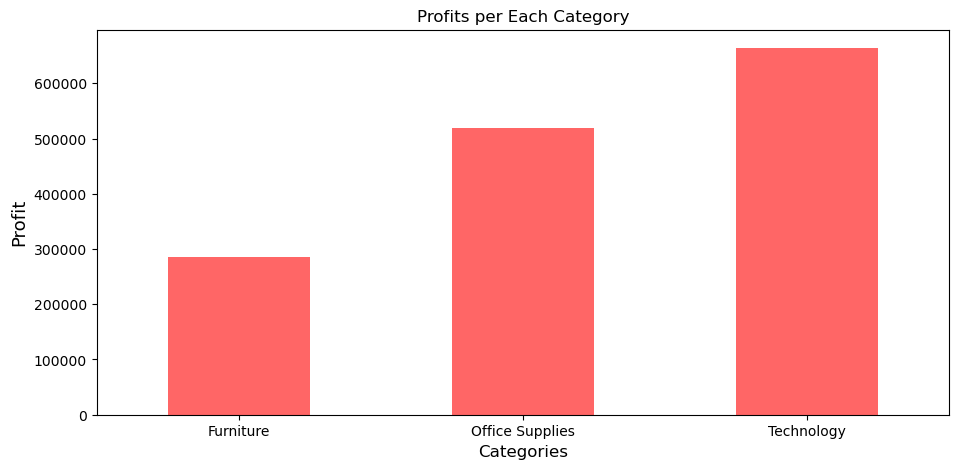

In [23]:
plt.figure(figsize=(11,5))
df1.plot(kind='bar',color='Red',alpha=0.6)
plt.title("Profits per Each Category")
plt.xlabel("Categories",fontsize=12)
plt.ylabel('Profit',fontsize=13)
plt.xticks(rotation=0)
plt.show()

#### Hypothesis 1's Conclusion : The Hypotheses is True i.e., the 'Technology' Category has the Highest Profit Margin

### Hypothesis 2. 'East' Region has the highest sales compared to other Regions

In [24]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [25]:
#df.groupby('Region')['Sales'].sum()

In [26]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [27]:
df2 = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
df2

Region
Central          2822302.52
South            1600907.04
North            1248165.60
Oceania          1100184.61
Southeast Asia    884423.17
North Asia        848309.78
EMEA              806161.31
Africa            783773.21
Central Asia      752826.57
West              725457.82
East              678781.24
Caribbean         324280.86
Canada             66928.17
Name: Sales, dtype: float64

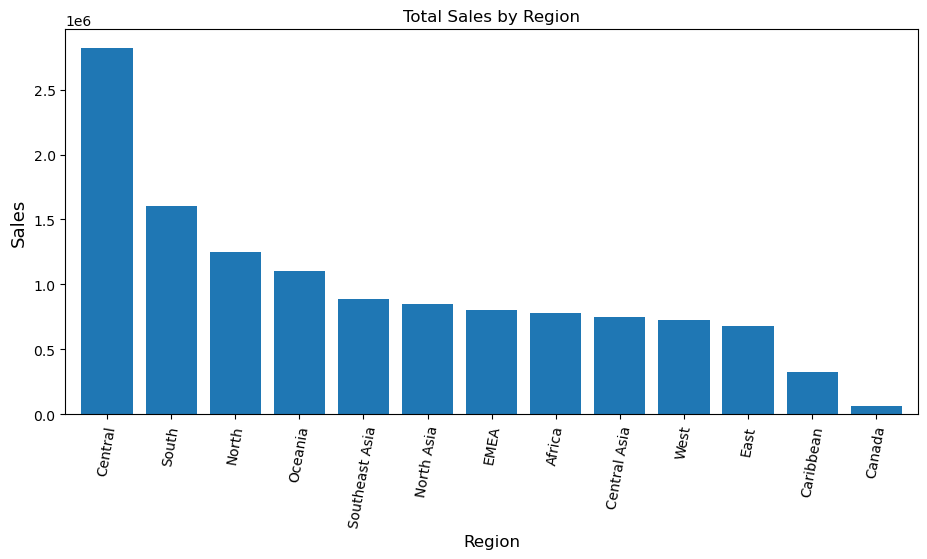

In [28]:
plt.figure(figsize=(11,5))
df2.plot(kind='bar',width=0.8)
plt.title('Total Sales by Region')
plt.xlabel('Region',fontsize=12)
plt.ylabel('Sales',fontsize=13)
plt.xticks(rotation=80)
plt.show()

#### Hypothesis 2's Conclusion : Rejecting the Hypothesis as the 'East' Region is not having the most Sales, but 'Central' Region does

### Hypothesis 3. Sales are higher during certain Months of the Year

In [29]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [30]:
df['Order Month'] = pd.DatetimeIndex(df['Order Date']).month
df.head(2)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Month
0,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium,1
1,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium,1


In [31]:
df3 = df.groupby('Order Month')['Sales'].sum()
df3

Order Month
1     775766.91
2     722853.17
3     951333.08
4     851617.32
5     976415.68
6    1152367.79
7     838743.56
8    1247500.81
9    1244139.73
10   1120777.47
11   1377651.29
12   1383335.11
Name: Sales, dtype: float64

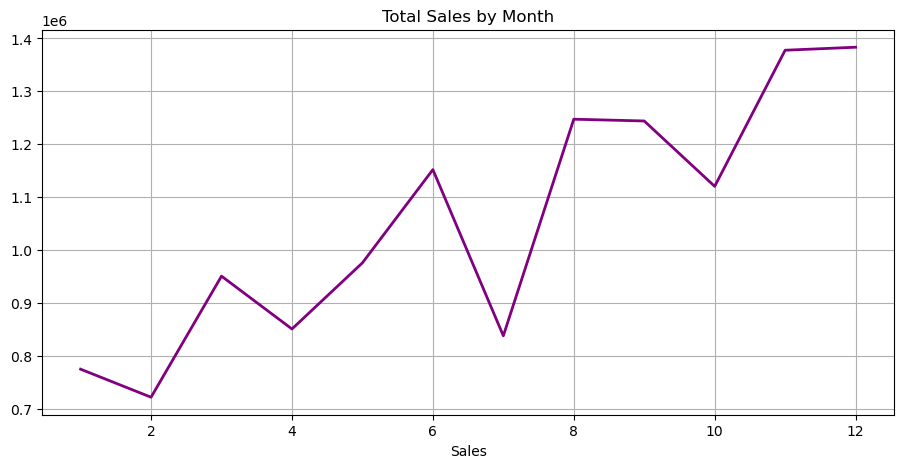

In [32]:
plt.figure(figsize=(11,5))
df3.plot(kind='line',color='purple',linewidth=2)
plt.xlabel('Month')
plt.xlabel('Sales')
plt.title("Total Sales by Month")
plt.grid()
plt.show()

#### Hypothesis 3's Conclusion: Accepting the Hypothesis as it is True. Sales are higher in certain Months. Ecpecially in the Months of November and December

### Hypothesis 4. Orders with 'Same Day' shipping have lowest rate of Returned Products

In [33]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Order Month'],
      dtype='object')

In [34]:
df['Ship Mode'].unique()

array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
      dtype=object)

In [35]:
total_orders_per_shipmode = df['Ship Mode'].value_counts()
total_orders_per_shipmode

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

In [36]:
returned_orders_per_shipmode = df[df['Profit']<0]['Ship Mode'].value_counts()
returned_orders_per_shipmode

Standard Class    7534
Second Class      2482
First Class       1882
Same Day           646
Name: Ship Mode, dtype: int64

In [37]:
# considering the orders with profit < 0 to be returned orders (as per expert opinion ;) )

In [38]:
Percentage_returned_per_shipmode = (returned_orders_per_shipmode/total_orders_per_shipmode)*100
Percentage_returned_per_shipmode

Standard Class   24.48
Second Class     24.08
First Class      25.08
Same Day         23.92
Name: Ship Mode, dtype: float64

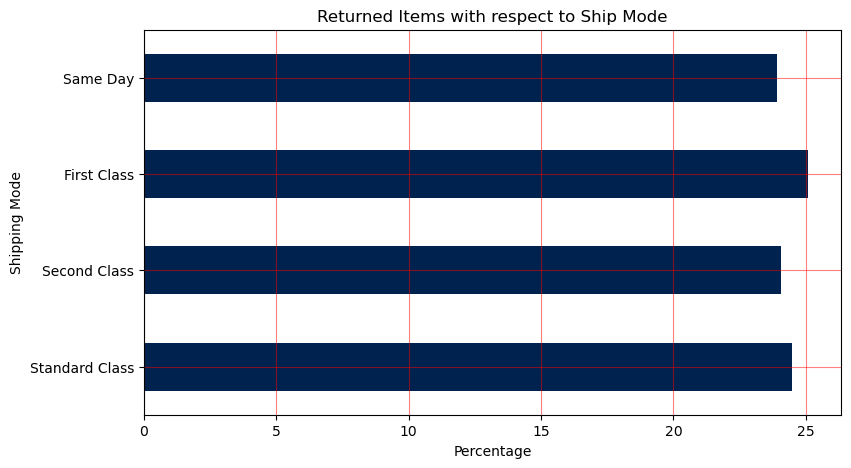

In [39]:
plt.figure(figsize=(9,5))
Percentage_returned_per_shipmode.plot(kind='barh',colormap='cividis')
plt.xlabel("Percentage")
plt.ylabel("Shipping Mode")
plt.title("Returned Items with respect to Ship Mode")
plt.grid(color='r',alpha=0.5)
plt.show()

#### Hypothesis 4's Conclusion : Accepting Hypothesis, as it is True i.e., items that are shipped on the Same Day have the lowest rate of Returned Products

### Hypothesis 5. The Company's Profit is more on Weekdays than on Weekends

In [40]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Order Month'],
      dtype='object')

In [41]:
df['Order Day'] = pd.DatetimeIndex(df['Order Date']).day_name()
df['Order Day']

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
51285    Wednesday
51286    Wednesday
51287    Wednesday
51288    Wednesday
51289    Wednesday
Name: Order Day, Length: 51290, dtype: object

In [42]:
df5 = df.groupby('Order Day')['Profit'].sum()
df5

Order Day
Friday      243802.84
Monday      246526.56
Saturday    176486.55
Sunday      104117.91
Thursday    241183.08
Tuesday     249788.05
Wednesday   205552.31
Name: Profit, dtype: float64

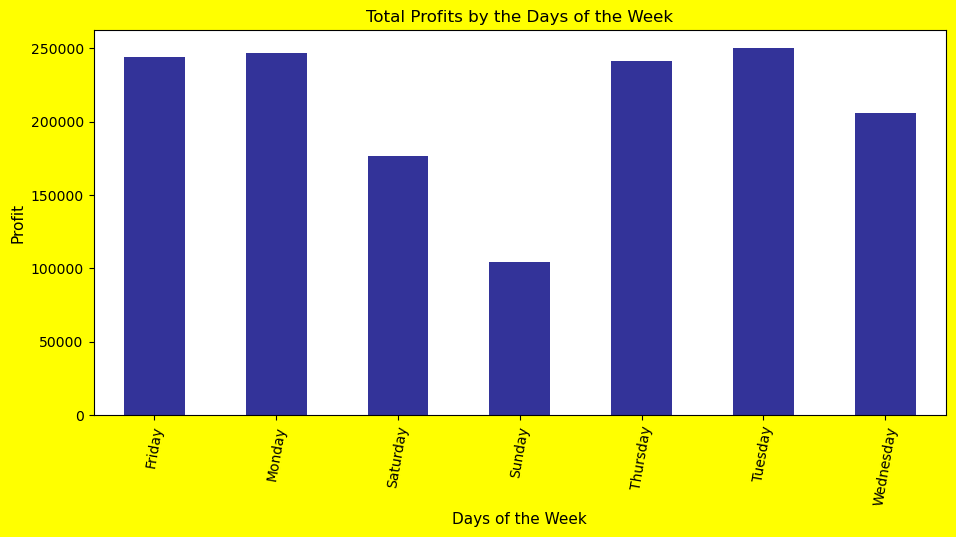

In [43]:
plt.figure(figsize=(11,5),facecolor='yellow')
df5.plot(kind='bar',colormap='terrain')
plt.title("Total Profits by the Days of the Week")
plt.xlabel("Days of the Week",fontsize=11)
plt.ylabel("Profit",fontsize=11)
plt.xticks(rotation=80)
plt.show()

#### Hypothesis 5's Conclusion : Accepting the Hypothesis as it is True i.e., Profits on Weedays are Higher than that of the Weekend's

In [ ]:
# Conclusions:
#    Hypothesis 1. 'Technology' category products have the highest profit margin compared to other categories
# Conclusion: This Hypothesis is proved to be True. The Data shows that the 'Technology' Products have the Highest Profit 
# Margin compared to the other Products.

# Hypothesis 2. 'East' Region has the highest sales compared to other Regions
# Conclusion: This Hypothesis is proved to be False, as the Data shows that the East Region does not have the
# Highest sales compared to other Regions.

# Hypothesis 3. Sales are higher during certain Months of the Year
# Conclusion: This Hypothesis is proved to be True. The Data shows that Sales are Higher during certain Months of the Year.
#
# Hypothesis 4. Orders with 'Same Day' shipping have lowest rate of Returned Products
# Conclusion: This Hypothesis is proved to be True. The Data shows that the Orders with 'Same Day' 
# shipping have lowest rate of Returned Products

# Hypothesis 5. The Company's profit is more on Weekdays than on Weekends
# Conclusion : This Hypothesis is proved to be True. The Data shows that the Company's profit is more on Weekdays
# than on Weekends


In [ ]:
# Results :
# Based on the Analysis, it is concluded that the 'Technology' Products have the Highest Profit 
# Margin compared to the other Products.
 
# The 'East' Region does not have the Highest Sales but the 'Central' Region does.

# Sales are Higher during certain Months of the Year.

# Orders with same-day Shipping are less likely to be Returned.

# The Company's Profit is Higher on Weekdays than on Weekends.

In [ ]:
# Suggestions :

# The Company could increase the production/ promotion of Technology Products to increase their Profitability.

# As the 'Central' Region has the Highest sales compared to other regions, the Company could condiser Increasing their focus on 
# this Region, and should re-evaluate its Marketing & Sales strageies in other Regions.

# The Company should focus on Maximizing their Sales during the Months of November and December as these months have the highest
# sales. However, the Company should also consider strategies to maintain Sales during other months such as introducting New
# Products, Services, Offers, Discounts.

# The Company could consider offering more Same-Day Shipping options to Customers, as these Products 
# have the lowest chance of being Returned.

# Additionally, the Company could consider Focusing of differnt types of Sales/ Promotions/ Offers/ Discounts during the
# Weekends to increase sales, as weekends are having lower Sales than the Weekdays. 

